# Weather Forcasting Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherforcast.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [5]:
df.drop('Date',axis=1,inplace=True)


In [6]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.duplicated().sum()

1673

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PerthAirport    1204
Albury           907
Newcastle        812
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      4332
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Length: 250, dtype: int64


4.0      141
3.0      125
2.2      118
2.4      116
2.6      116
        ... 
145.0      1
33.8       1
59.2       1
20.8       1
0.7        1
Name: Evaporation, Length: 116, dtype: int64


0

# Remove null Values

In [11]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

In [17]:
df.dropna(subset=['WindGustDir', 'WindDir9am','WindDir3pm'], inplace=True)

In [12]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
df.shape

(5266, 22)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

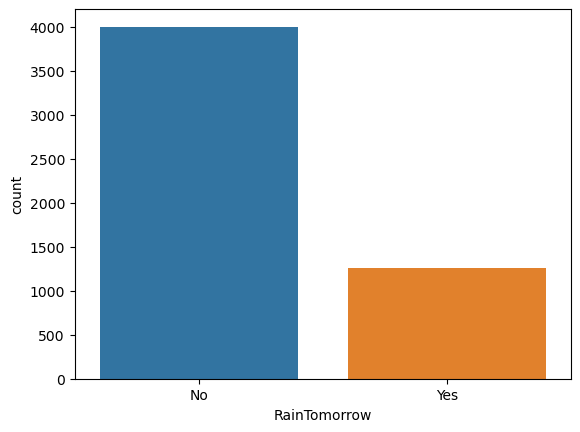

In [19]:
sns.countplot(data=df,x='RainTomorrow')

As we can see above that duplicate rows are removed and only unique rows are present in dataset now.

In [22]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000
mean,13.457881,24.379966,2.745404,5.092613,8.361299,39.804596,14.599126,18.737562,65.627991,49.643562,1017.443752,1014.945139,4.512153,4.488986,18.336631,22.956912
std,5.481136,6.243559,9.298133,3.095272,3.012371,14.099860,9.128572,8.815502,17.144978,18.781414,6.398611,6.330254,2.460233,2.364901,5.667165,6.087062
min,-1.300000,8.200000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.400000,19.800000,0.000000,3.600000,7.900000,30.000000,7.000000,11.000000,54.000000,36.000000,1013.300000,1010.600000,2.000000,2.000000,14.300000,18.600000
50%,13.450000,23.800000,0.000000,4.600000,9.000000,37.000000,13.000000,19.000000,66.000000,49.000000,1017.600000,1015.100000,5.000000,5.000000,18.200000,22.400000
75%,17.700000,28.800000,0.800000,6.000000,9.800000,48.000000,20.000000,24.000000,78.000000,62.000000,1021.400000,1018.900000,7.000000,6.000000,22.600000,27.100000
max,28.500000,45.500000,225.000000,59.200000,13.900000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


1.count is equal in each row.
2.If mean is greater than median means data skewed to right otherwise it skewed to right.
3.Differrence between 75% and maximum values showing outliers are present in feature data.


No     3997
Yes    1269
Name: RainToday, dtype: int64


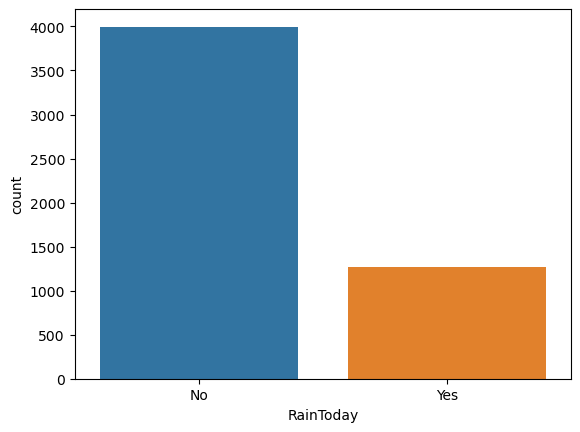

In [24]:
ax = sns.countplot(x='RainToday',data=df)
print(df['RainToday'].value_counts())

From visualization we can see that possibility of rain tomorrow is less.


array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

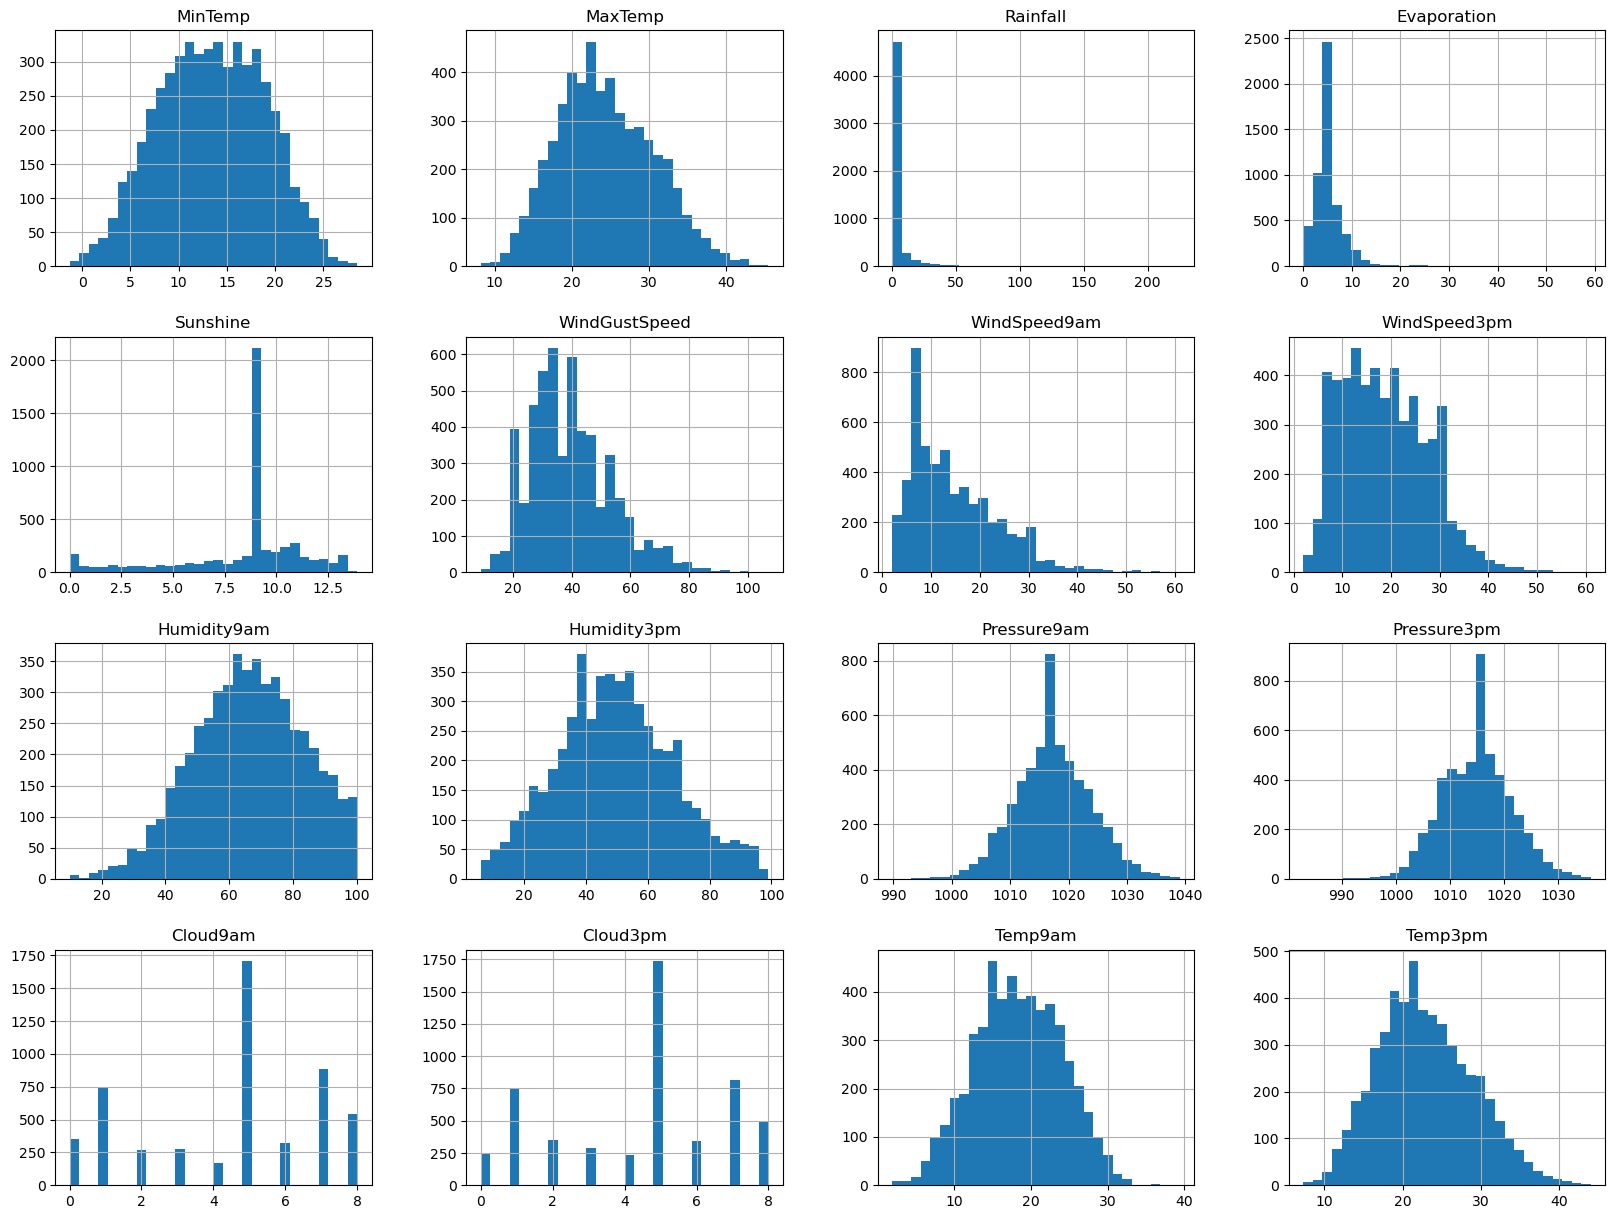

In [25]:
# plotting histogram for normal distribution
df.hist(figsize=(20,15),grid=True,layout=(4,4),bins=30)


<AxesSubplot:xlabel='RainToday'>

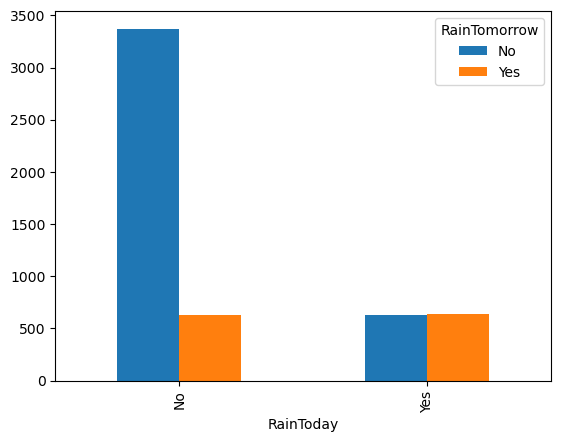

In [26]:
ax = pd.crosstab(df['RainToday'],df['RainTomorrow'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='Location'>

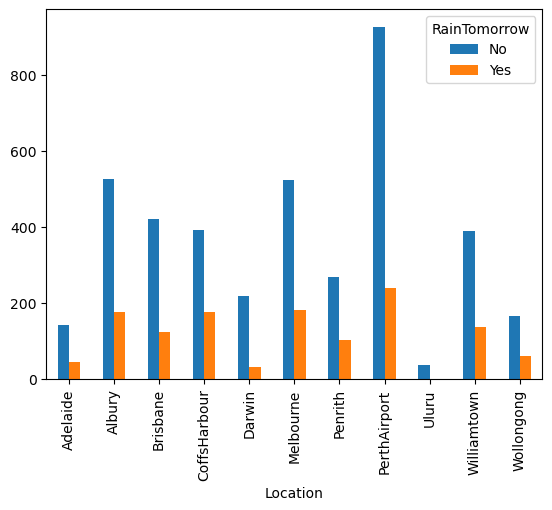

In [27]:
ax = pd.crosstab(df['Location'],df['RainTomorrow'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='WindGustDir'>

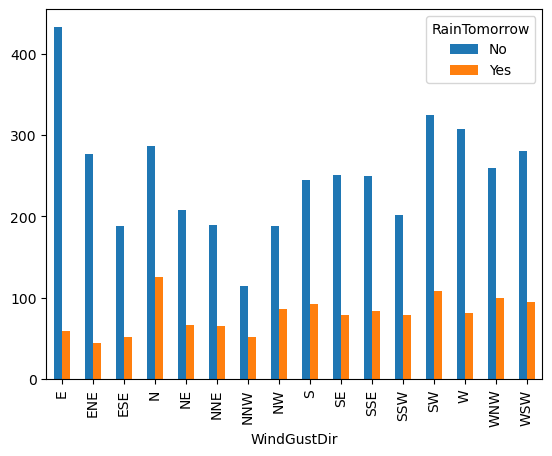

In [28]:
ax = pd.crosstab(df['WindGustDir'],df['RainTomorrow'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='WindDir3pm'>

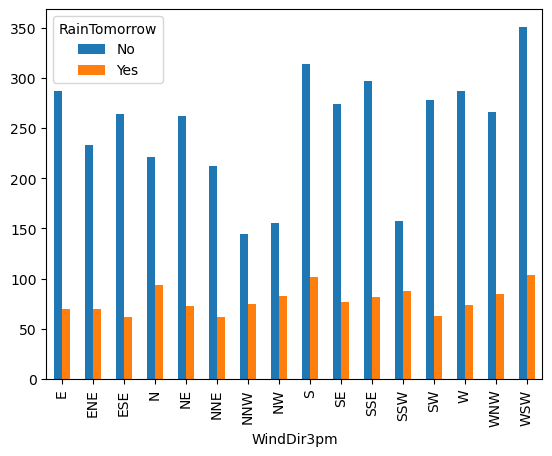

In [29]:
ax = pd.crosstab(df['WindDir3pm'],df['RainTomorrow'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='WindDir3pm'>

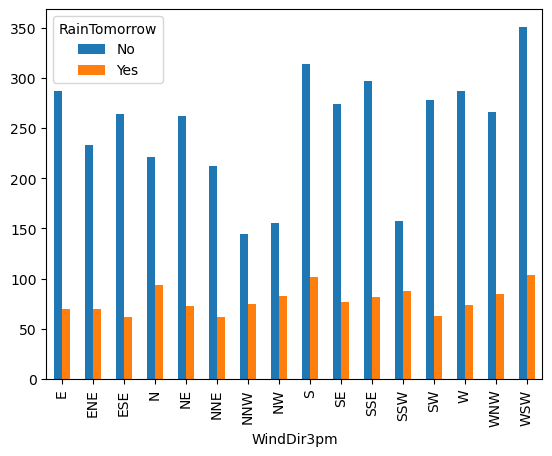

In [30]:
ax = pd.crosstab(df['WindDir3pm'],df['RainTomorrow'])
ax.plot(kind='bar')

<AxesSubplot:xlabel='WindSpeed3pm'>

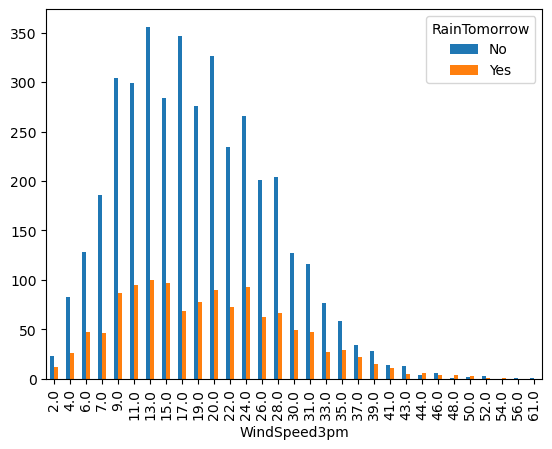

In [31]:
ax = pd.crosstab(df['WindSpeed3pm'],df['RainTomorrow'])
ax.plot(kind='bar')

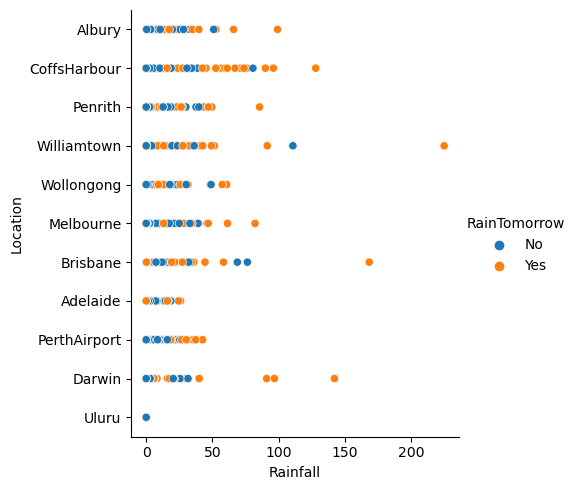

In [32]:
sns.relplot(data=df,y='Location',x='Rainfall',hue='RainTomorrow')
plt.show()

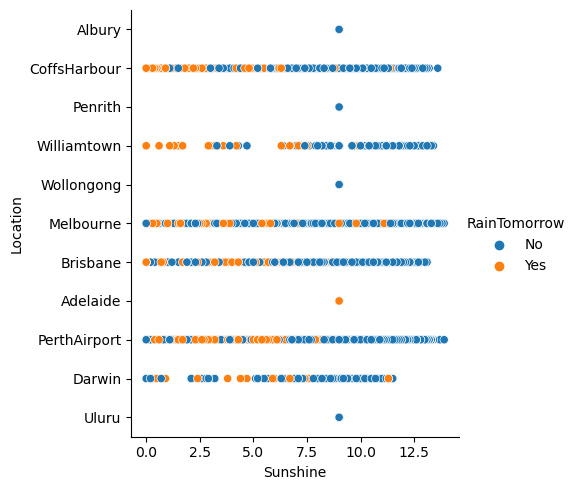

In [33]:
sns.relplot(data=df,y='Location',x='Sunshine',hue='RainTomorrow')
plt.show()

In [34]:
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


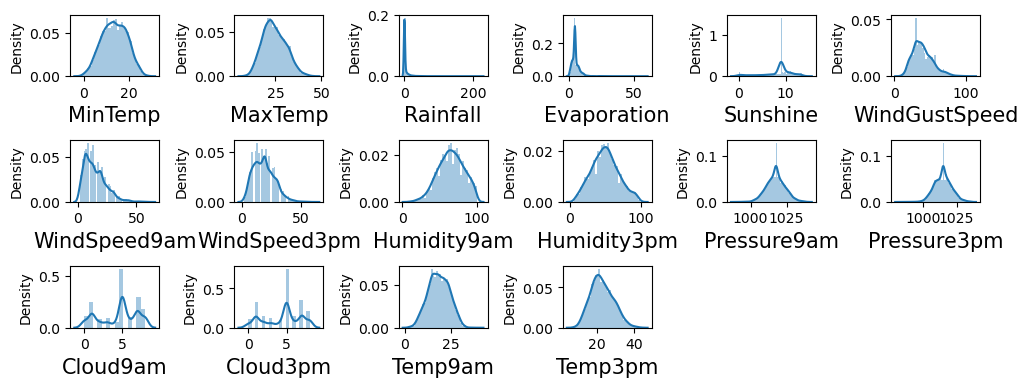

In [35]:
plt.figure(figsize=(10,6),facecolor='white')
plot =1
for col in num_col:
    if plot<17:
        ax=plt.subplot(5,6,plot)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

skewness is present in som columns data ,lets check for skewness

In [36]:
df.skew()

MinTemp         -0.043345
MaxTemp          0.296200
Rainfall         8.601063
Evaporation      3.718934
Sunshine        -1.169662
WindGustSpeed    0.763216
WindSpeed9am     1.015864
WindSpeed3pm     0.526224
Humidity9am     -0.188047
Humidity3pm      0.168857
Pressure9am      0.023950
Pressure3pm      0.046845
Cloud9am        -0.409506
Cloud3pm        -0.363030
Temp9am         -0.011110
Temp3pm          0.318205
dtype: float64

In [37]:
sk = ('Rainfall','Evaporation')
for i in sk:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [38]:
df.skew()

MinTemp         -0.043345
MaxTemp          0.296200
Rainfall         1.890607
Evaporation     -0.212584
Sunshine        -1.169662
WindGustSpeed    0.763216
WindSpeed9am     1.015864
WindSpeed3pm     0.526224
Humidity9am     -0.188047
Humidity3pm      0.168857
Pressure9am      0.023950
Pressure3pm      0.046845
Cloud9am        -0.409506
Cloud3pm        -0.363030
Temp9am         -0.011110
Temp3pm          0.318205
dtype: float64

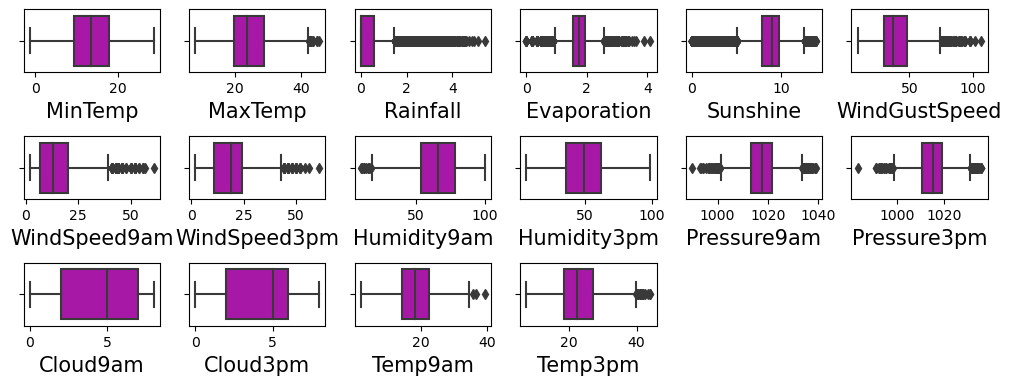

In [39]:
plt.figure(figsize=(10,6),facecolor='white')
plot =1
for col in num_col:
    if plot<17:
        ax=plt.subplot(5,6,plot)
        sns.boxplot(df[col],color='m')
        plt.xlabel(col,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

outliers are present in rainfall,windgustspeed,windspeed9am,3pm,temp9am.
we need to remove outliers using zscore.

# Encoding 

In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,13.4,22.9,0.470004,1.722767,9.0,13.0,44.0,13.0,14.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0
1,1.0,7.4,25.1,0.000000,1.722767,9.0,14.0,44.0,6.0,15.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0
2,1.0,12.9,25.7,0.000000,1.722767,9.0,15.0,46.0,13.0,15.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0
3,1.0,9.2,28.0,0.000000,1.722767,9.0,4.0,24.0,9.0,0.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0.0
4,1.0,17.5,32.3,0.693147,1.722767,9.0,13.0,41.0,1.0,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8.0,3.5,21.8,0.000000,1.722767,9.0,0.0,31.0,2.0,0.0,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0.0,0.0
8420,8.0,2.8,23.4,0.000000,1.722767,9.0,0.0,31.0,9.0,1.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0.0,0.0
8421,8.0,3.6,25.3,0.000000,1.722767,9.0,6.0,22.0,9.0,3.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0.0,0.0
8422,8.0,5.4,26.9,0.000000,1.722767,9.0,3.0,37.0,9.0,14.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,0.0


Now all features are in Numerical dtypes

with Encoding technique we convert categorical column data into numerical form.

In [41]:
df.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

# Remove Outliers

In [42]:
from scipy.stats import zscore
zs = np.abs(zscore(df))
zs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.359806,0.010561,0.237061,0.057576,0.036609,0.212046,1.097598,0.297578,1.166751,1.300936,...,0.313358,1.471997,1.522936,1.239426,1.417824,0.216103,0.253525,0.190079,0.563461,0.561998
1,1.359806,1.105328,0.115335,0.542424,0.036609,0.212046,1.302706,0.297578,0.325676,1.510836,...,1.261597,1.312250,1.069670,1.128836,0.198312,0.216103,0.200583,0.220667,0.563461,0.561998
2,1.359806,0.101792,0.211443,0.542424,0.036609,0.212046,1.507815,0.439436,1.166751,1.510836,...,1.611586,1.046004,1.538566,0.986648,0.198312,1.052569,0.470010,0.039939,0.563461,0.561998
3,1.359806,0.776898,0.579858,0.542424,0.036609,0.212046,0.748377,1.121011,0.313935,1.637669,...,1.203265,1.791492,0.024421,0.338903,0.198312,0.216103,0.041759,0.582124,0.563461,0.561998
4,1.359806,0.737530,1.268633,0.172615,0.036609,0.212046,1.097598,0.084789,1.391696,0.168367,...,0.955006,0.886256,1.038410,1.413212,1.011320,1.484776,0.094700,1.107879,0.563461,0.561998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,1.105043,1.816927,0.413260,0.542424,0.036609,0.212046,1.568810,0.624505,1.178492,1.637669,...,0.386622,1.205751,1.134142,0.988184,0.198312,0.216103,1.577064,0.337948,0.563461,0.561998
8420,1.105043,1.944650,0.156971,0.542424,0.036609,0.212046,1.568810,0.624505,0.313935,1.427769,...,0.853275,1.365499,1.118513,0.845996,0.198312,0.216103,1.453533,0.091500,0.563461,0.561998
8421,1.105043,1.798681,0.147371,0.542424,0.036609,0.212046,0.338160,1.262870,0.313935,1.007968,...,0.561617,1.525246,0.946584,0.656412,0.198312,0.216103,1.312356,0.253527,0.563461,0.561998
8422,1.105043,1.470251,0.403660,0.542424,0.036609,0.212046,0.953485,0.198928,0.313935,1.300936,...,0.736612,1.365499,0.555837,0.293043,0.198312,0.216103,1.030001,0.516404,0.563461,0.561998


In [43]:
thresh =3
print(np.where(zs<3))
print(df.shape)

(array([   0,    0,    0, ..., 5265, 5265, 5265], dtype=int64), array([ 0,  1,  2, ..., 19, 20, 21], dtype=int64))
(5266, 22)


In [44]:
df_new = df[(zs<3).all(axis=1)]


In [45]:
print(df.shape)
print(df_new.shape)

(5266, 22)
(4967, 22)


In [46]:
df=df_new
print('after removing outliers:',df.shape)

after removing outliers: (4967, 22)


# Correlation between target variable and independant variable

In [47]:
cor = df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.069403,0.043658,-0.000548,0.095168,0.039625,-0.046784,0.266829,-0.126391,0.003146,...,-0.020662,0.012861,0.003756,0.020221,0.004225,-0.008517,0.069227,0.041189,-0.007538,-0.005731
MinTemp,0.069403,1.000000,0.732125,0.058271,0.411945,0.017886,-0.198851,0.198903,-0.082702,-0.160112,...,-0.121865,0.070067,-0.452718,-0.455603,0.042349,-0.002426,0.885233,0.701750,0.041733,0.068050
MaxTemp,0.043658,0.732125,1.000000,-0.241204,0.506299,0.351100,-0.275068,0.138038,-0.252520,-0.167276,...,-0.422548,-0.436137,-0.344243,-0.431353,-0.274288,-0.263796,0.875170,0.981271,-0.252588,-0.189557
Rainfall,-0.000548,0.058271,-0.241204,1.000000,-0.192453,-0.266002,0.150654,0.098297,0.170082,0.100701,...,0.420327,0.385673,-0.126793,-0.041040,0.278457,0.234049,-0.118742,-0.249963,0.906728,0.351688
Evaporation,0.095168,0.411945,0.506299,-0.192453,1.000000,0.403946,-0.122311,0.206183,-0.103070,-0.019472,...,-0.380175,-0.270153,-0.281716,-0.302764,-0.139539,-0.179042,0.484979,0.493552,-0.196009,-0.125666
Sunshine,0.039625,0.017886,0.351100,-0.266002,0.403946,1.000000,-0.090802,0.007738,-0.081655,-0.041002,...,-0.371458,-0.455556,-0.017476,-0.075588,-0.547313,-0.568025,0.219599,0.372507,-0.252309,-0.367954
WindGustDir,-0.046784,-0.198851,-0.275068,0.150654,-0.122311,-0.090802,1.000000,-0.000043,0.399104,0.556158,...,0.099348,0.098520,-0.107223,-0.015018,0.139545,0.109145,-0.223657,-0.286521,0.147364,0.053981
WindGustSpeed,0.266829,0.198903,0.138038,0.098297,0.206183,0.007738,-0.000043,1.000000,-0.144784,0.094023,...,-0.253266,-0.106138,-0.355431,-0.321659,0.004760,0.040340,0.172488,0.105373,0.083746,0.180486
WindDir9am,-0.126391,-0.082702,-0.252520,0.170082,-0.103070,-0.081655,0.399104,-0.144784,1.000000,0.224853,...,0.110986,0.172755,0.002616,0.088964,0.094111,0.062411,-0.148869,-0.258486,0.171066,0.033828
WindDir3pm,0.003146,-0.160112,-0.167276,0.100701,-0.019472,-0.041002,0.556158,0.094023,0.224853,1.000000,...,-0.017135,-0.030558,-0.143437,-0.050844,0.081050,0.045910,-0.160421,-0.177898,0.095454,-0.004207


1.There is strong positive correlation between minimum temp.and maximum temp.
which is expected since higher maximum temperature tend to be associated with higher minimum temperature.
2.positive corrrelation between rainfall and raintoday suggest that when there is rainfall today,it is vary likely that there was rainfall.
3.there is strong positive correlation between maximum temperature and temperature at 3pm,atmosphere at 9am and atmospheric pressure at 3pm.
4.There is moderate positive correlation between raintomorrow and rainfall ,humidity at 9am and humidity at 3pm.

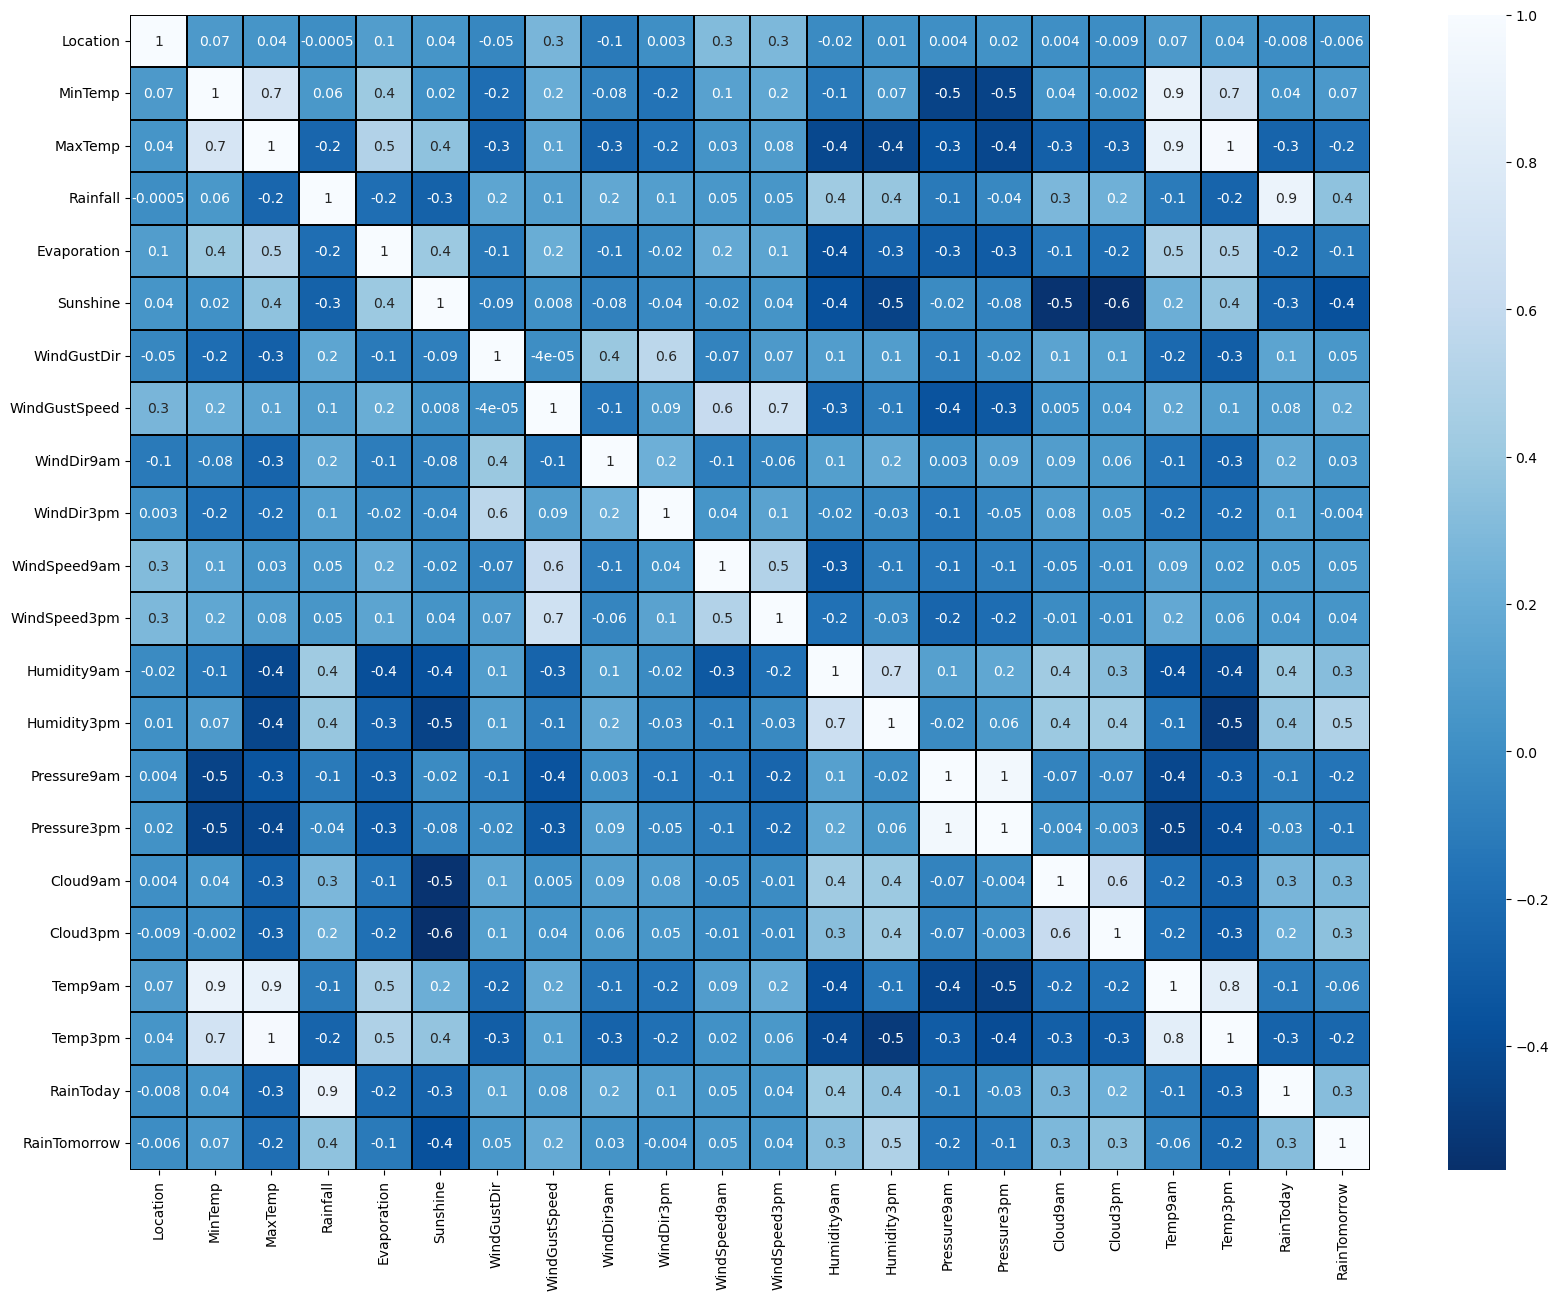

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',cmap='Blues_r',linecolor='black',annot=True)
plt.yticks(rotation=0)
plt.show()

In [49]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.493951
Rainfall         0.351688
Cloud3pm         0.349106
RainToday        0.323881
Humidity9am      0.322981
Cloud9am         0.289388
WindGustSpeed    0.180486
MinTemp          0.068050
WindGustDir      0.053981
WindSpeed9am     0.048445
WindSpeed3pm     0.042277
WindDir9am       0.033828
WindDir3pm      -0.004207
Location        -0.005731
Temp9am         -0.060806
Evaporation     -0.125666
Pressure3pm     -0.127443
Pressure9am     -0.156759
MaxTemp         -0.189557
Temp3pm         -0.233928
Sunshine        -0.367954
Name: RainTomorrow, dtype: float64

# Visualizing correlation between target and feature using barplot

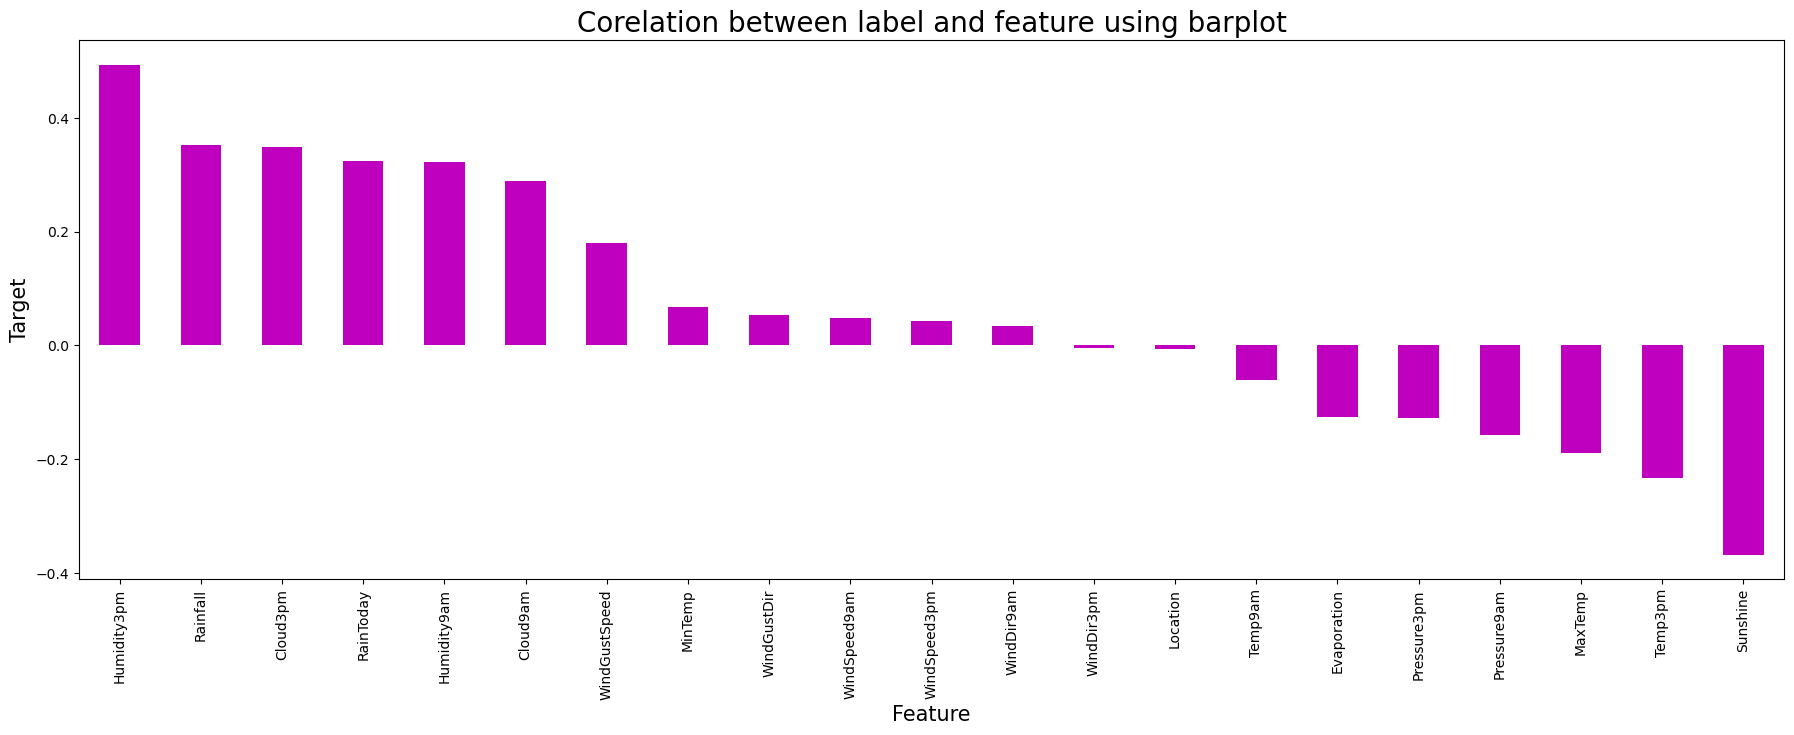

In [51]:
#we can see +ve and -ve relation columns with target column
plt.figure(figsize = (22,7))
df.corr()['RainTomorrow'].sort_values(ascending =False).drop(['RainTomorrow']).plot(kind='bar',color = 'm')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Corelation between label and feature using barplot',fontsize=20)
plt.show()

# Seperating features and label

In [52]:
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

# Feature scaling using Standard Scalarization

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale = StandardScaler()
ax = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
ax

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.348267,0.004540,-0.242540,0.011170,0.043805,0.189313,1.093371,0.389699,1.165437,1.299052,...,0.669863,0.329711,-1.476620,-1.605728,-1.306699,1.439407,0.238060,-0.250831,-0.197567,-0.538637
1,-1.348267,-1.088324,0.115221,-0.536338,0.043805,0.189313,1.297951,0.389699,-0.327987,1.508845,...,0.432095,-1.274336,-1.314403,-1.133760,-1.191586,0.218447,0.238060,-0.197610,0.219077,-0.538637
2,-1.348267,-0.086532,0.212793,-0.536338,0.043805,0.189313,1.502531,0.542563,1.165437,1.508845,...,0.907632,-1.630791,-1.044041,-1.622002,-1.043583,0.218447,-1.031564,0.476518,0.035754,-0.538637
3,-1.348267,-0.760465,0.586816,-0.536338,0.043805,0.189313,-0.747847,-1.138938,0.312052,-1.638049,...,-1.113399,-1.214927,-1.801054,0.005472,-0.369347,0.218447,0.238060,-0.037948,0.585724,-0.538637
4,-1.348267,0.751330,1.286077,0.271110,0.043805,0.189313,1.093371,0.160404,-1.394719,-0.169499,...,0.194327,0.983211,-0.881824,-1.101211,-1.487592,1.032421,1.507684,-0.091169,1.119028,-0.538637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,1.120419,-1.798686,-0.421421,-0.536338,0.043805,0.189313,-1.566166,-0.603915,-1.181373,-1.638049,...,-0.637863,-0.383199,-1.206258,1.160979,1.012014,0.218447,0.238060,-1.581348,-0.347558,-0.538637
4963,1.120419,-1.926187,-0.161231,-0.536338,0.043805,0.189313,-1.566166,-0.603915,0.312052,-1.428256,...,-0.875631,-0.858472,-1.368475,1.144704,0.864011,0.218447,0.238060,-1.457166,-0.097572,-0.538637
4964,1.120419,-1.780471,0.147745,-0.536338,0.043805,0.189313,-0.338687,-1.291801,0.312052,-1.008671,...,-1.113399,-0.561426,-1.530692,0.965682,0.666674,0.218447,0.238060,-1.315245,0.252409,-0.538637
4965,1.120419,-1.452612,0.407935,-0.536338,0.043805,0.189313,-0.952427,-0.145324,0.312052,1.299052,...,-1.113399,-0.739654,-1.368475,0.558813,0.288444,0.218447,0.238060,-1.031401,0.519061,-0.538637


After applying feature scaling ,the values in each column has been transformed to have mean of approximately 0 and standard deviation of approximately 1.

# Checking VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,4.574194,Location
1,59.007920,MinTemp
2,642.426291,MaxTemp
3,7.590407,Rainfall
4,30.221238,Evaporation
5,19.440841,Sunshine
6,5.984884,WindGustDir
7,24.921063,WindGustSpeed
8,4.870396,WindDir9am
9,5.805439,WindDir3pm


In [58]:
x.drop('Pressure9am',axis = 1,inplace=True)
x.drop('Pressure3pm',axis=1,inplace=True)


# Oversampling

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [61]:
y.value_counts()

0.0    3836
1.0    1131
Name: RainTomorrow, dtype: int64

In [62]:
y1.value_counts()

0.0    3836
1.0    3836
Name: RainTomorrow, dtype: int64

# Modelling

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

In [71]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),
          ExtraTreesClassifier(),LogisticRegression(),
         GradientBoostingClassifier()]
max_acc = 0
for st in range(40,70):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = st,test_size=0.33)
    for i in models:
        i.fit(x_train,y_train)
        pred = i.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc >max_acc:
            max_acc = acc
            final_st = st
            final_model = i
print()
print()
print('max r2 score correspond to random state:',final_st,'is',max_acc,'and model is:',final_model)



max r2 score correspond to random state: 58 is 0.8664634146341463 and model is: GradientBoostingClassifier()


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 58,test_size=0.33)


In [74]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)
predgr = gr.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

0.8664634146341463
[[1222   61]
 [ 158  199]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1283
         1.0       0.77      0.56      0.65       357

    accuracy                           0.87      1640
   macro avg       0.83      0.75      0.78      1640
weighted avg       0.86      0.87      0.86      1640



# Hyper Tunning

In [75]:
param = {'n_estimators':[50,100,200],
        'learning_rate':[0.01,0.1,0.2],
        'max_depth':[3,4,5]}

In [76]:
grid = GridSearchCV(GradientBoostingClassifier(),param,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [77]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [78]:
final_model = GradientBoostingClassifier(learning_rate=0.2,max_depth=3,n_estimators=100)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

85.36585365853658


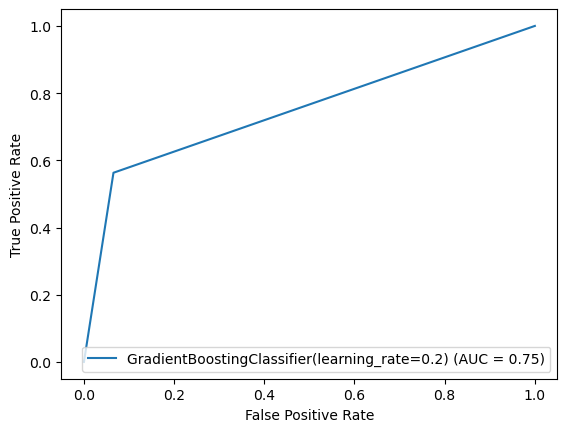

In [79]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

here we have plotted ROC curve for the final model and AUC value for the best model is 75%.

# Saving the Model

In [80]:
import joblib
joblib.dump(final_model,'weatherforcast.pkl')


['weatherforcast.pkl']

# Predicting the saved model

In [82]:
model =joblib.load('weatherforcast.pkl')
pred1 = model.predict(x_test)
pred1

array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = pred1
df1['Original'] = a

In [84]:
df1

,Predicted,Original
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1635,0.0,0.0
1636,0.0,0.0
1637,0.0,0.0
1638,0.0,0.0


-------------------------------------------------------------------------------------------

# Predicting Rainfall

In [86]:
data=pd.read_csv('weatherforcast.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


predict how much rainfall could be there

In [88]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [89]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [90]:
data.duplicated().sum()

1663

In [91]:
data.drop_duplicates(inplace=True)

In [92]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                      'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

In [93]:
data.dropna(subset=['WindGustDir', 'WindDir9am','WindDir3pm'], inplace=True)

In [94]:
data.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [96]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

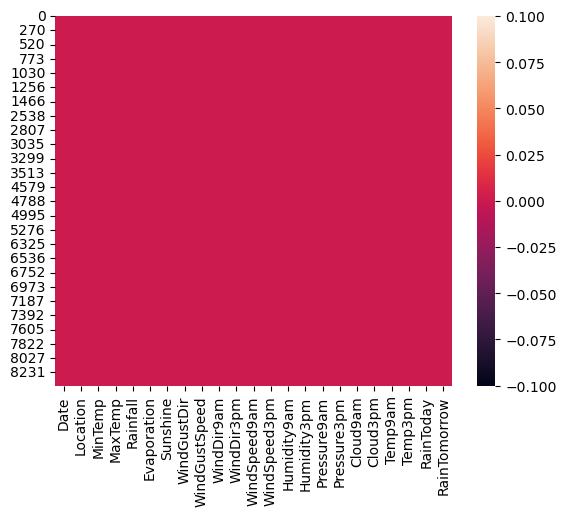

In [97]:
sns.heatmap(data.isnull())

In [106]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000
mean,13.457881,24.379966,2.745404,5.092613,8.361299,39.804596,14.599126,18.737562,65.627991,49.643562,1017.443752,1014.945139,4.512153,4.488986,18.336631,22.956912
std,5.481136,6.243559,9.298133,3.095272,3.012371,14.099860,9.128572,8.815502,17.144978,18.781414,6.398611,6.330254,2.460233,2.364901,5.667165,6.087062
min,-1.300000,8.200000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.400000,19.800000,0.000000,3.600000,7.900000,30.000000,7.000000,11.000000,54.000000,36.000000,1013.300000,1010.600000,2.000000,2.000000,14.300000,18.600000
50%,13.450000,23.800000,0.000000,4.600000,9.000000,37.000000,13.000000,19.000000,66.000000,49.000000,1017.600000,1015.100000,5.000000,5.000000,18.200000,22.400000
75%,17.700000,28.800000,0.800000,6.000000,9.800000,48.000000,20.000000,24.000000,78.000000,62.000000,1021.400000,1018.900000,7.000000,6.000000,22.600000,27.100000
max,28.500000,45.500000,225.000000,59.200000,13.900000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<AxesSubplot:xlabel='RainToday', ylabel='count'>

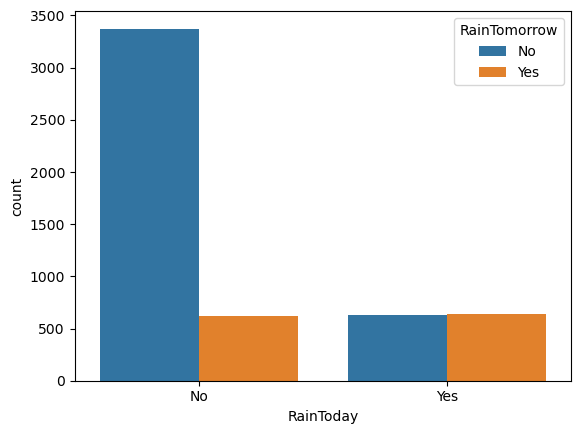

In [100]:
sns.countplot(x='RainToday',hue='RainTomorrow',data=data)

In [101]:
data.groupby('Location')['Rainfall'].mean()

Location
Adelaide        1.462703
Albury          2.526106
Brisbane        3.086029
CoffsHarbour    4.561552
Darwin          2.735200
Melbourne       2.333144
Penrith         2.773984
PerthAirport    1.884364
Uluru           0.000000
Williamtown     3.608987
Wollongong      3.224107
Name: Rainfall, dtype: float64

checking the mean of Rainfall at every location

In [105]:
data.Rainfall.value_counts()

0.0      3500
0.2       233
0.4       111
0.6        65
1.4        57
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
20.4        1
Name: Rainfall, Length: 230, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

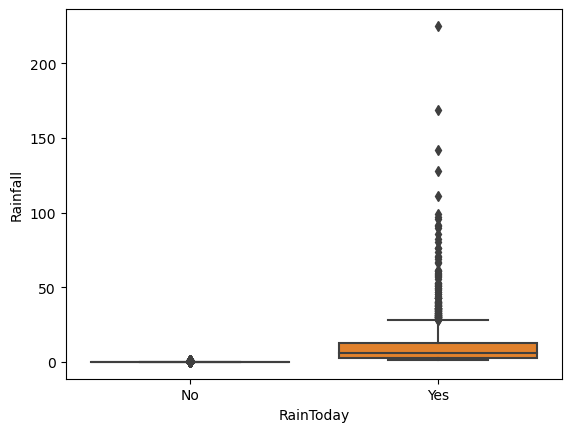

In [108]:
sns.boxplot(x='RainToday',y='Rainfall',data=data)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

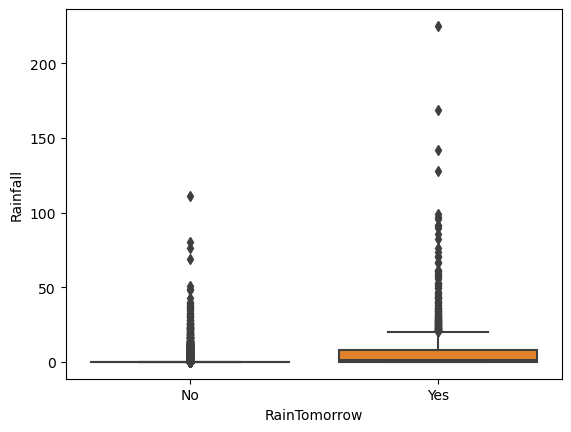

In [110]:
sns.boxplot(x='RainTomorrow',y='Rainfall',data=data)

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

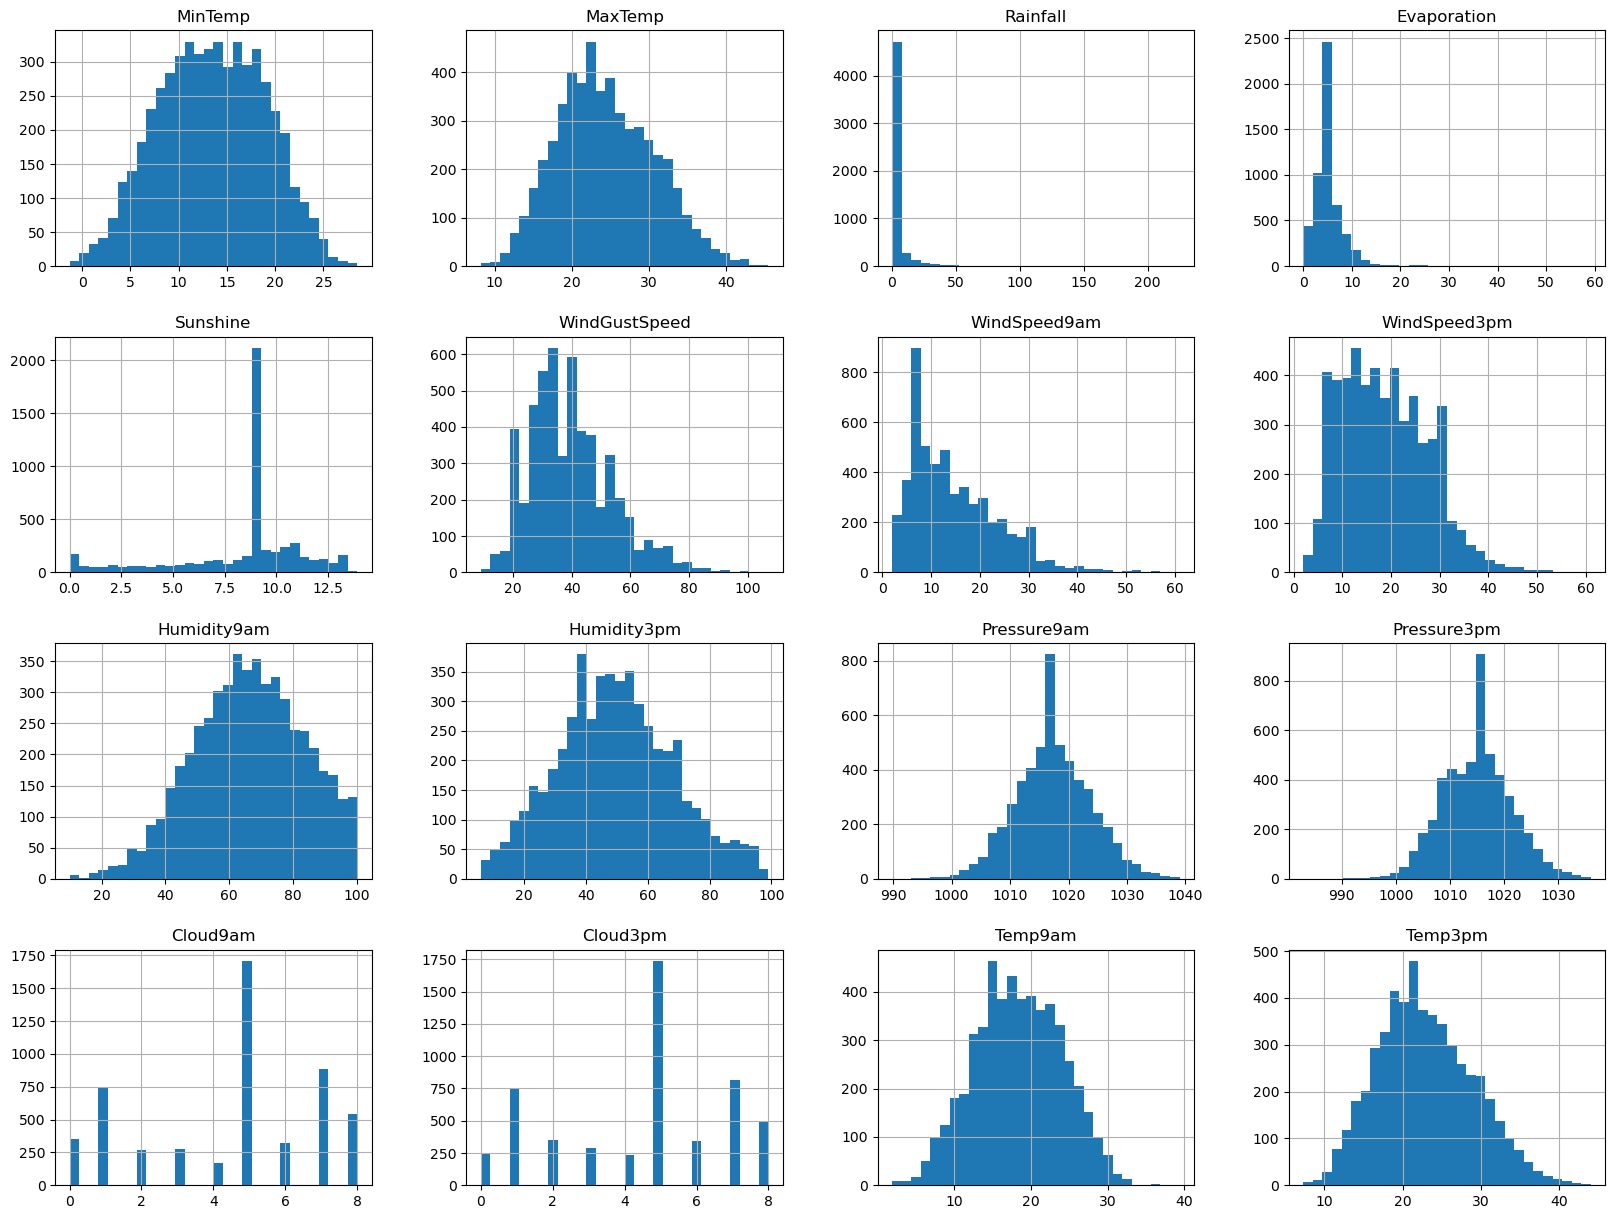

In [111]:
# plotting histogram for normal distribution
data.hist(figsize=(20,15),grid=True,layout=(4,4),bins=30)

In [112]:
data.skew()

MinTemp         -0.043345
MaxTemp          0.296200
Rainfall         8.601063
Evaporation      3.718934
Sunshine        -1.169662
WindGustSpeed    0.763216
WindSpeed9am     1.015864
WindSpeed3pm     0.526224
Humidity9am     -0.188047
Humidity3pm      0.168857
Pressure9am      0.023950
Pressure3pm      0.046845
Cloud9am        -0.409506
Cloud3pm        -0.363030
Temp9am         -0.011110
Temp3pm          0.318205
dtype: float64

In [113]:
sk = ('Rainfall','Evaporation')
for col in sk:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [114]:
data.skew()

MinTemp         -0.043345
MaxTemp          0.296200
Rainfall         1.890607
Evaporation     -0.212584
Sunshine        -1.169662
WindGustSpeed    0.763216
WindSpeed9am     1.015864
WindSpeed3pm     0.526224
Humidity9am     -0.188047
Humidity3pm      0.168857
Pressure9am      0.023950
Pressure3pm      0.046845
Cloud9am        -0.409506
Cloud3pm        -0.363030
Temp9am         -0.011110
Temp3pm          0.318205
dtype: float64

MinTemp             AxesSubplot(0.125,0.712609;0.133621x0.167391)
MaxTemp          AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Rainfall          AxesSubplot(0.44569,0.712609;0.133621x0.167391)
Evaporation      AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Sunshine         AxesSubplot(0.766379,0.712609;0.133621x0.167391)
WindGustSpeed       AxesSubplot(0.125,0.511739;0.133621x0.167391)
WindSpeed9am     AxesSubplot(0.285345,0.511739;0.133621x0.167391)
WindSpeed3pm      AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Humidity9am      AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Humidity3pm      AxesSubplot(0.766379,0.511739;0.133621x0.167391)
Pressure9am          AxesSubplot(0.125,0.31087;0.133621x0.167391)
Pressure3pm       AxesSubplot(0.285345,0.31087;0.133621x0.167391)
Cloud9am           AxesSubplot(0.44569,0.31087;0.133621x0.167391)
Cloud3pm          AxesSubplot(0.606034,0.31087;0.133621x0.167391)
Temp9am           AxesSubplot(0.766379,0.31087;0.133621x0.167391)
Temp3pm   

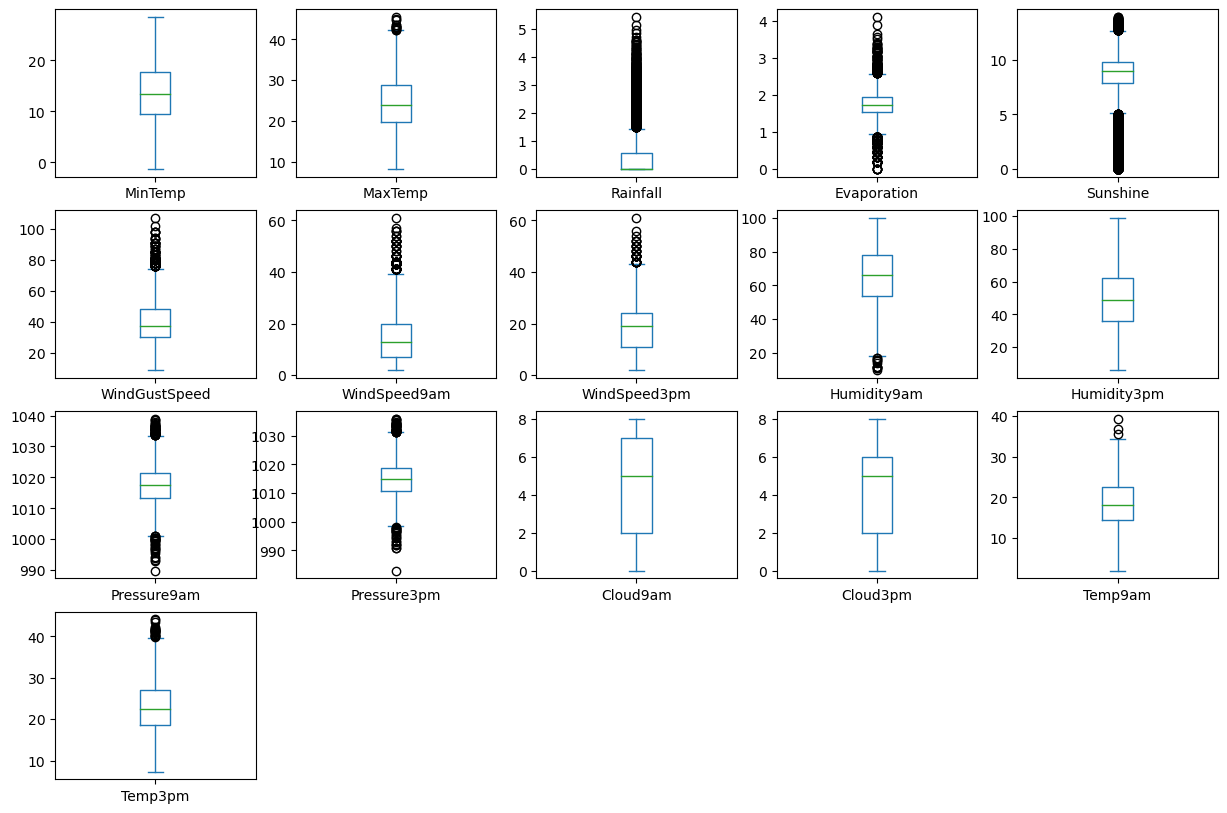

In [115]:
data.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [116]:
data.drop('Date',axis=1,inplace = True)

In [117]:
data.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [118]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = oe.fit_transform(data[i].values.reshape(-1,1))
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,13.4,22.9,0.470004,1.722767,9.0,13.0,44.0,13.0,14.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0
1,1.0,7.4,25.1,0.000000,1.722767,9.0,14.0,44.0,6.0,15.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0
2,1.0,12.9,25.7,0.000000,1.722767,9.0,15.0,46.0,13.0,15.0,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0
3,1.0,9.2,28.0,0.000000,1.722767,9.0,4.0,24.0,9.0,0.0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0.0
4,1.0,17.5,32.3,0.693147,1.722767,9.0,13.0,41.0,1.0,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,8.0,3.5,21.8,0.000000,1.722767,9.0,0.0,31.0,2.0,0.0,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0.0,0.0
8420,8.0,2.8,23.4,0.000000,1.722767,9.0,0.0,31.0,9.0,1.0,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0.0,0.0
8421,8.0,3.6,25.3,0.000000,1.722767,9.0,6.0,22.0,9.0,3.0,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0.0,0.0
8422,8.0,5.4,26.9,0.000000,1.722767,9.0,3.0,37.0,9.0,14.0,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,0.0


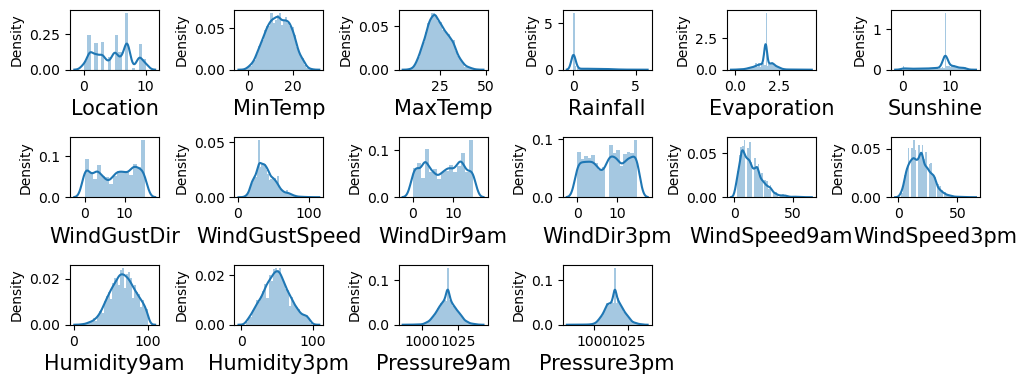

In [119]:
plt.figure(figsize=(10,6),facecolor='white')
plot =1
for col in data.columns:
    if plot<17:
        ax=plt.subplot(5,6,plot)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

# Remove Outliers

In [121]:
from scipy.stats import zscore
zs = np.abs(zscore(data))
zs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.359806,0.010561,0.237061,0.057576,0.036609,0.212046,1.097598,0.297578,1.166751,1.300936,...,0.313358,1.471997,1.522936,1.239426,1.417824,0.216103,0.253525,0.190079,0.563461,0.561998
1,1.359806,1.105328,0.115335,0.542424,0.036609,0.212046,1.302706,0.297578,0.325676,1.510836,...,1.261597,1.312250,1.069670,1.128836,0.198312,0.216103,0.200583,0.220667,0.563461,0.561998
2,1.359806,0.101792,0.211443,0.542424,0.036609,0.212046,1.507815,0.439436,1.166751,1.510836,...,1.611586,1.046004,1.538566,0.986648,0.198312,1.052569,0.470010,0.039939,0.563461,0.561998
3,1.359806,0.776898,0.579858,0.542424,0.036609,0.212046,0.748377,1.121011,0.313935,1.637669,...,1.203265,1.791492,0.024421,0.338903,0.198312,0.216103,0.041759,0.582124,0.563461,0.561998
4,1.359806,0.737530,1.268633,0.172615,0.036609,0.212046,1.097598,0.084789,1.391696,0.168367,...,0.955006,0.886256,1.038410,1.413212,1.011320,1.484776,0.094700,1.107879,0.563461,0.561998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,1.105043,1.816927,0.413260,0.542424,0.036609,0.212046,1.568810,0.624505,1.178492,1.637669,...,0.386622,1.205751,1.134142,0.988184,0.198312,0.216103,1.577064,0.337948,0.563461,0.561998
8420,1.105043,1.944650,0.156971,0.542424,0.036609,0.212046,1.568810,0.624505,0.313935,1.427769,...,0.853275,1.365499,1.118513,0.845996,0.198312,0.216103,1.453533,0.091500,0.563461,0.561998
8421,1.105043,1.798681,0.147371,0.542424,0.036609,0.212046,0.338160,1.262870,0.313935,1.007968,...,0.561617,1.525246,0.946584,0.656412,0.198312,0.216103,1.312356,0.253527,0.563461,0.561998
8422,1.105043,1.470251,0.403660,0.542424,0.036609,0.212046,0.953485,0.198928,0.313935,1.300936,...,0.736612,1.365499,0.555837,0.293043,0.198312,0.216103,1.030001,0.516404,0.563461,0.561998


In [122]:
thresh =3
print(np.where(zs<3))
print(data.shape)

(array([   0,    0,    0, ..., 5265, 5265, 5265], dtype=int64), array([ 0,  1,  2, ..., 19, 20, 21], dtype=int64))
(5266, 22)


In [124]:
df_new = data[(zs<3).all(axis=1)]
print(data.shape)
print(df_new.shape)
data=df_new
print('after removing outliers:',data.shape)


(5266, 22)
(4967, 22)
after removing outliers: (4967, 22)


In [125]:
cor = data.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.069403,0.043658,-0.000548,0.095168,0.039625,-0.046784,0.266829,-0.126391,0.003146,...,-0.020662,0.012861,0.003756,0.020221,0.004225,-0.008517,0.069227,0.041189,-0.007538,-0.005731
MinTemp,0.069403,1.000000,0.732125,0.058271,0.411945,0.017886,-0.198851,0.198903,-0.082702,-0.160112,...,-0.121865,0.070067,-0.452718,-0.455603,0.042349,-0.002426,0.885233,0.701750,0.041733,0.068050
MaxTemp,0.043658,0.732125,1.000000,-0.241204,0.506299,0.351100,-0.275068,0.138038,-0.252520,-0.167276,...,-0.422548,-0.436137,-0.344243,-0.431353,-0.274288,-0.263796,0.875170,0.981271,-0.252588,-0.189557
Rainfall,-0.000548,0.058271,-0.241204,1.000000,-0.192453,-0.266002,0.150654,0.098297,0.170082,0.100701,...,0.420327,0.385673,-0.126793,-0.041040,0.278457,0.234049,-0.118742,-0.249963,0.906728,0.351688
Evaporation,0.095168,0.411945,0.506299,-0.192453,1.000000,0.403946,-0.122311,0.206183,-0.103070,-0.019472,...,-0.380175,-0.270153,-0.281716,-0.302764,-0.139539,-0.179042,0.484979,0.493552,-0.196009,-0.125666
Sunshine,0.039625,0.017886,0.351100,-0.266002,0.403946,1.000000,-0.090802,0.007738,-0.081655,-0.041002,...,-0.371458,-0.455556,-0.017476,-0.075588,-0.547313,-0.568025,0.219599,0.372507,-0.252309,-0.367954
WindGustDir,-0.046784,-0.198851,-0.275068,0.150654,-0.122311,-0.090802,1.000000,-0.000043,0.399104,0.556158,...,0.099348,0.098520,-0.107223,-0.015018,0.139545,0.109145,-0.223657,-0.286521,0.147364,0.053981
WindGustSpeed,0.266829,0.198903,0.138038,0.098297,0.206183,0.007738,-0.000043,1.000000,-0.144784,0.094023,...,-0.253266,-0.106138,-0.355431,-0.321659,0.004760,0.040340,0.172488,0.105373,0.083746,0.180486
WindDir9am,-0.126391,-0.082702,-0.252520,0.170082,-0.103070,-0.081655,0.399104,-0.144784,1.000000,0.224853,...,0.110986,0.172755,0.002616,0.088964,0.094111,0.062411,-0.148869,-0.258486,0.171066,0.033828
WindDir3pm,0.003146,-0.160112,-0.167276,0.100701,-0.019472,-0.041002,0.556158,0.094023,0.224853,1.000000,...,-0.017135,-0.030558,-0.143437,-0.050844,0.081050,0.045910,-0.160421,-0.177898,0.095454,-0.004207


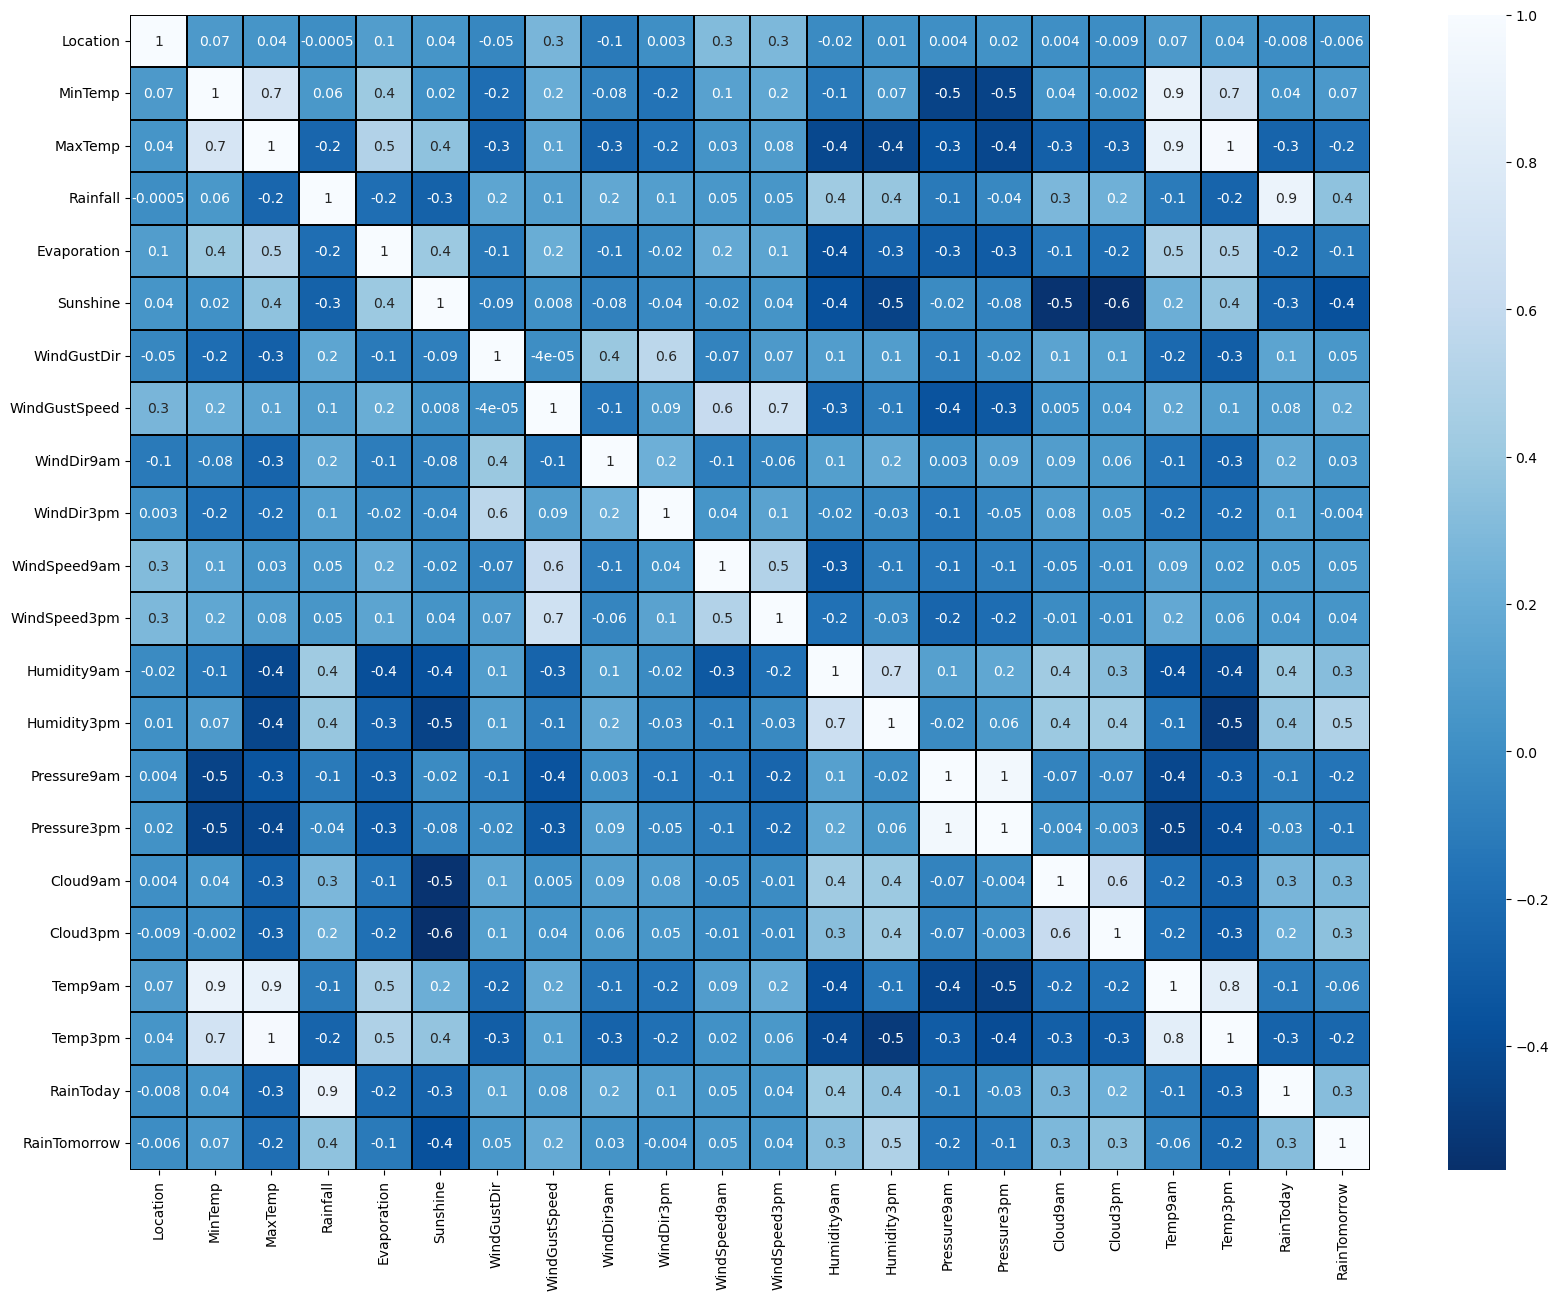

In [126]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),linewidths=0.1,fmt='.1g',cmap='Blues_r',linecolor='black',annot=True)
plt.yticks(rotation=0)
plt.show()

In [127]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.906728
Humidity9am      0.420327
Humidity3pm      0.385673
RainTomorrow     0.351688
Cloud9am         0.278457
Cloud3pm         0.234049
WindDir9am       0.170082
WindGustDir      0.150654
WindDir3pm       0.100701
WindGustSpeed    0.098297
MinTemp          0.058271
WindSpeed9am     0.053453
WindSpeed3pm     0.045950
Location        -0.000548
Pressure3pm     -0.041040
Temp9am         -0.118742
Pressure9am     -0.126793
Evaporation     -0.192453
MaxTemp         -0.241204
Temp3pm         -0.249963
Sunshine        -0.266002
Name: Rainfall, dtype: float64

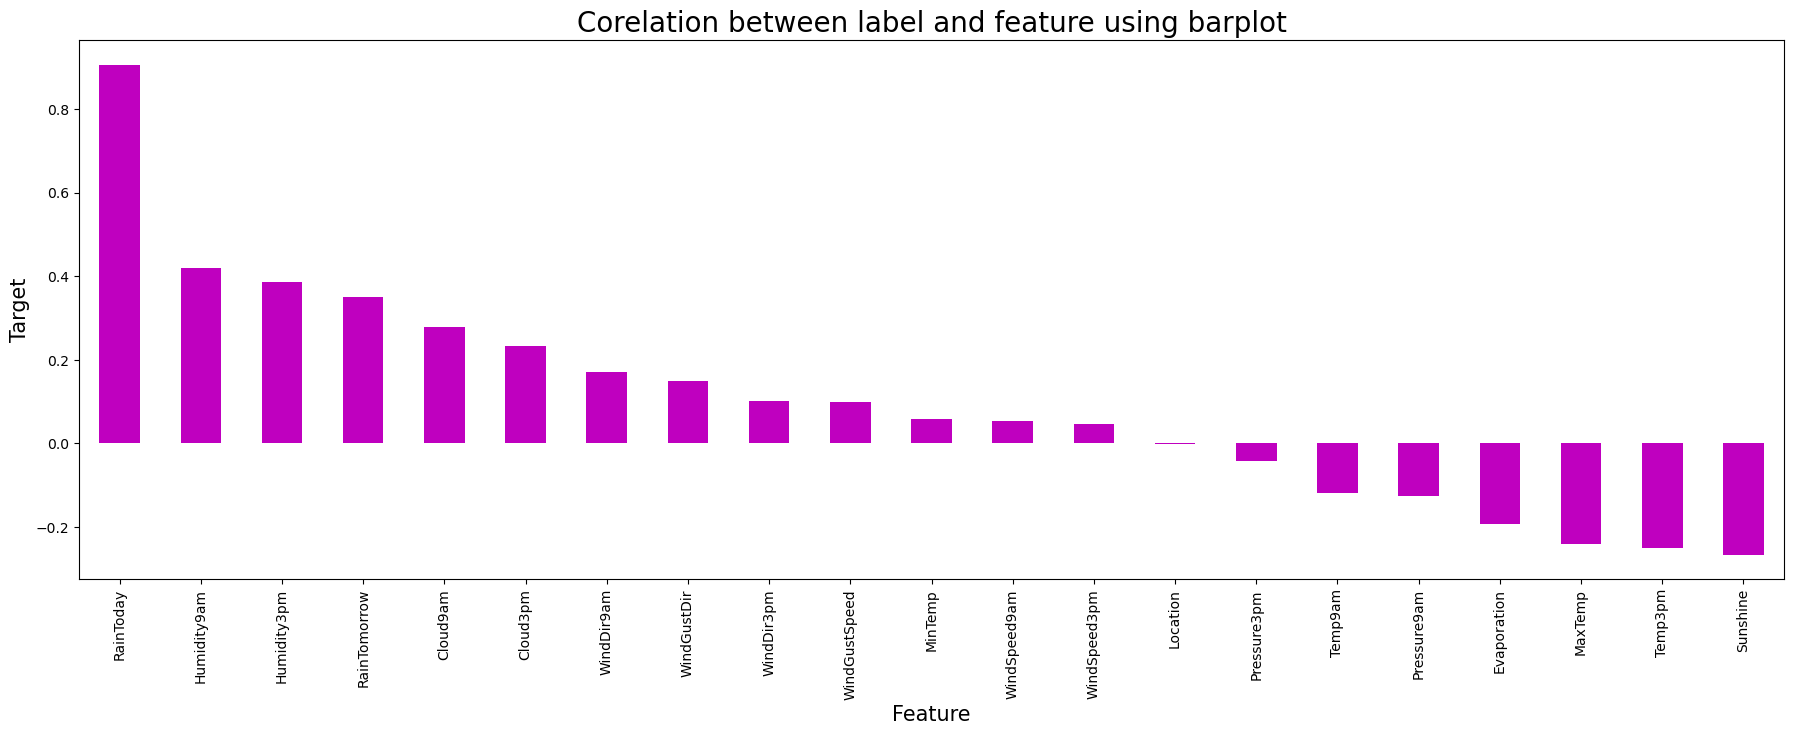

In [128]:
#we can see +ve and -ve relation columns with target column
plt.figure(figsize = (22,7))
data.corr()['Rainfall'].sort_values(ascending =False).drop(['Rainfall']).plot(kind='bar',color = 'm')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Corelation between label and feature using barplot',fontsize=20)
plt.show()

# Seperate features and label

In [129]:
x = data.drop(['Rainfall'],axis=1)
y = data['Rainfall']

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelling

In [135]:
models = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]

max_r2 = 0
for st in range(40, 90):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=st, test_size=0.33)
    for model in models:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        r2 = r2_score(y_test, predictions)
#         print('r2 score correspond to random state:', st, 'is:', r2)
        if r2 > max_r2:
            max_r2 = r2
            final_state = st
            final_model = model

print()
print()
print('max r2 score correspond to random state:', final_state, 'is:', max_r2, 'and model is:', final_model)





max r2 score correspond to random state: 63 is: 0.8504272162634903 and model is: GradientBoostingRegressor()


In [139]:
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred = gr.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

83.18549957430888


In [141]:
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean absolute error',mean_squared_error(y_test,pred))
print('np.sqrt(mean absolute error)',np.sqrt(mean_absolute_error(y_test,pred)))
print('r2_score',r2_score(y_test,pred))


mean absolute error 0.1540859914670495
mean absolute error 0.12769259139010022
np.sqrt(mean absolute error) 0.39253788539076007
r2_score 0.8330132938578482


In [143]:
# checking difference between actual and predicted value using graph
a = np.array(y_test)
data1 = pd.DataFrame()
data1['Predicted'] = pred
data1['Original'] = a

In [144]:
data1

,Predicted,Original
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
1635,0.000000,0.000000
1636,0.000000,0.000000
1637,0.426991,0.182322
1638,1.586725,2.517696


# ===================================================================